## Setup

In [1]:
# use full window width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
os.chdir('..')
from matplotlib import pyplot as plt
import numpy as np

import virl

## Generate Reward Plots

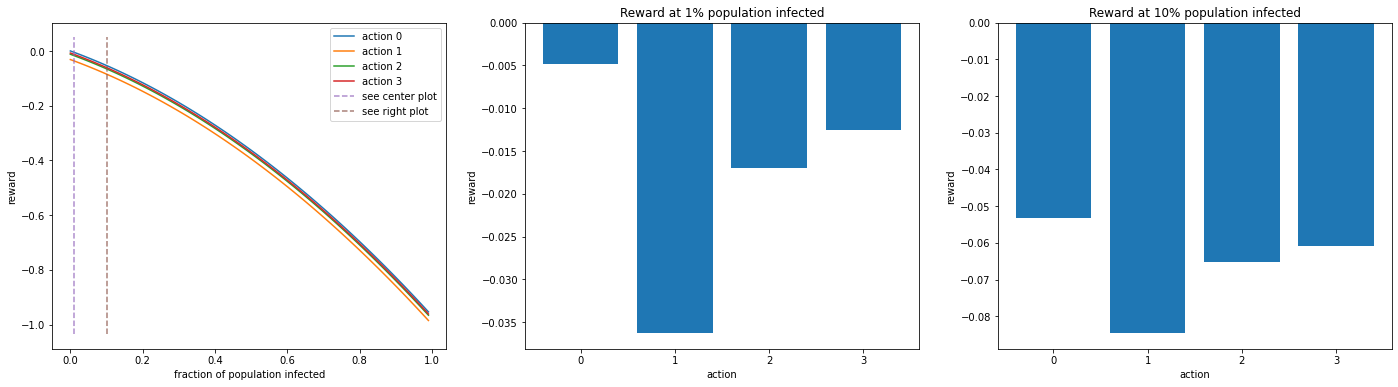

In [3]:
s = np.array([0., 0, 0, 0]) # epidemic state
c = 1. # infection rate damping
env = virl.Epidemic(stochastic=False, noisy=False)

fig, axes = plt.subplots(1, 3, figsize=(3*8, 6))

for k in range(4):
    a = [env._reward(np.array([0, i/100, 0, 0]), env.actions[k]) for i in range(100)]
    axes[0].plot(np.arange(100)/100, a, label=f'action {k}')

axes[0].set_ylabel('reward')
axes[0].set_xlabel('fraction of population infected')
y = axes[0].get_ylim()

infected = [0.01, 0.1]
plot = ['center', 'right']
for i in range(2):
    x = infected[i]
    b = [env._reward([0,x, 0,0], env.actions[a]) for a in range(4)]
    axes[0].plot([x, x], y, '--', alpha=0.75, label=f'see {plot[i]} plot')
    axes[i+1].bar(np.arange(4), height=b)
    axes[i+1].set_xticks([0, 1, 2, 3])
    axes[i+1].set_xlabel('action')
    axes[i+1].set_ylabel('reward')
    axes[i+1].set_title(f'Reward at {(x*100):.0f}% population infected')

axes[0].legend()

plt.savefig(dpi=300, fname='reward.png')

## Generate Problem ID plots

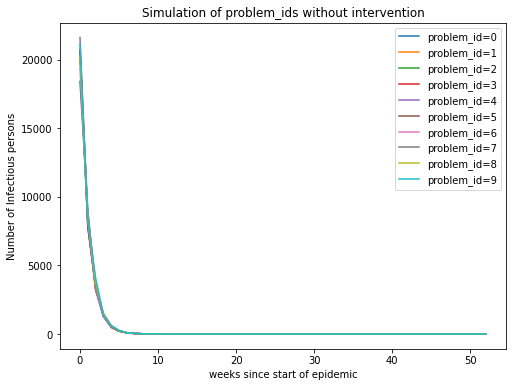

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(10):
    env = virl.Epidemic(problem_id=i, noisy=True)
    states = []
    rewards = []
    done = False
    s = env.reset()
    states.append(s)
    while not done:
        s, r, done, info = env.step(action=1) # deterministic agent
        states.append(s)
        rewards.append(r)
    ax.plot(np.array(states)[:,1], label=f'problem_id={i}')
ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('Number of Infectious persons')
ax.set_title('Simulation of problem_ids without intervention')
ax.legend()
plt.savefig(dpi=300, fname='problem_id.png')

## Generate Noisy Observation Plot

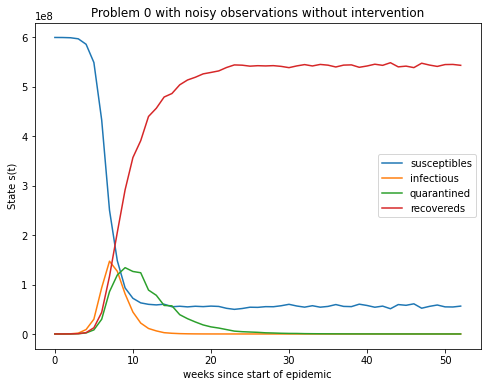

In [5]:
env = virl.Epidemic(problem_id=0, noisy=True)
states = []
rewards = []
done = False
s = env.reset()
states.append(s)
while not done:
    s, r, done, info = env.step(action=0) # deterministic agent
    states.append(s)
    rewards.append(r)

fig, ax = plt.subplots(figsize=(8, 6))
labels = ['susceptibles', 'infectious', 'quarantined', 'recovereds']
states = np.array(states)
for i in range(4):
    ax.plot(states[:,i], label=labels[i]);
ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('State s(t)')
ax.set_title('Problem 0 with noisy observations without intervention')
ax.legend()
plt.savefig(dpi=300, fname='noisy.png')

## Generate stochastic sample simulations

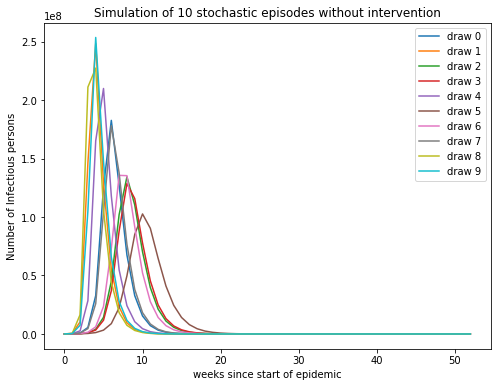

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(10):
    env = virl.Epidemic(stochastic=True)
    states = []
    rewards = []
    done = False
    s = env.reset()
    states.append(s)
    while not done:
        s, r, done, info = env.step(action=0) # deterministic agent
        states.append(s)
        rewards.append(r)
    ax.plot(np.array(states)[:,1], label=f'draw {i}')
ax.set_xlabel('weeks since start of epidemic')
ax.set_ylabel('Number of Infectious persons')
ax.set_title('Simulation of 10 stochastic episodes without intervention')
ax.legend()
plt.savefig(dpi=300, fname='stochastic.png')